# **1)Parts of Speech Tagging**

In [38]:
import spacy
nlp = spacy.load('en_core_web_sm')

### 1.1)Splitting the Tokens

In [39]:
sent = 'GPT is one of the first of its kind AGI'

In [40]:
d = nlp(sent)

In [41]:
d

GPT is one of the first of its kind AGI

In [42]:
d[0]

GPT

In [43]:
len(d)

10

In [44]:
#converting token in to text
d[0].text

'GPT'

### 1.2)Finding the Part of Speech

In [45]:
d[0].pos_

'PROPN'

In [46]:
d[5].pos_

'ADJ'

In [47]:
for words in d:
  print(words , '-' , words.pos_)# check the tabular form of part of speech and grained part of speech in geeksforgeeks

GPT - PROPN
is - AUX
one - NUM
of - ADP
the - DET
first - ADJ
of - ADP
its - PRON
kind - ADJ
AGI - NOUN


### 1.3) Finding the Grained Part of SPeech

In [48]:
for words in d:
  print(words , '-' , words.tag_)

GPT - NNP
is - VBZ
one - CD
of - IN
the - DT
first - JJ
of - IN
its - PRP$
kind - JJ
AGI - NN


### 1.4)Spacy.explain() function

In [49]:
for token in d:
  print(f'{token.text:{15}}{token.pos_:{15}}{token.tag_:{15}}{spacy.explain(token.tag_)}')#15 is about spaces

GPT            PROPN          NNP            noun, proper singular
is             AUX            VBZ            verb, 3rd person singular present
one            NUM            CD             cardinal number
of             ADP            IN             conjunction, subordinating or preposition
the            DET            DT             determiner
first          ADJ            JJ             adjective (English), other noun-modifier (Chinese)
of             ADP            IN             conjunction, subordinating or preposition
its            PRON           PRP$           pronoun, possessive
kind           ADJ            JJ             adjective (English), other noun-modifier (Chinese)
AGI            NOUN           NN             noun, singular or mass


In [50]:
spacy.explain(d[0].tag_)

'noun, proper singular'

### 1.5)Visualization of Parts of Speech

In [51]:
from spacy import displacy

In [52]:
d

GPT is one of the first of its kind AGI

In [53]:
displacy.render(d)#map of whole part of speech

In [54]:
displacy.render(d , options = {'distance' : 100, 'color' : 'white' , 'bg' : 'black' , 'font' : 'times'})

# **2)Named Entity Recognition**



- The named entity recognition(NER) is one of the most data preprocessing task.
It involves the identification of key information in the text and classification into a set of predefined categories.An entity is basically the thing that is consistently talked about or refer to in the text

### 2.1)Defining Entity Function

In [55]:
doc = nlp('GFG is an Indian company which provides one of the finest education.')

In [56]:
doc.ents #Prints the entites which are found

(GFG, Indian, one)

In [57]:
def show_entities(doc):

  if doc.ents:
    for ent in doc.ents:
      print(ent , '|' , ent.label_ , '|' ,spacy.explain(ent.label_))
  else:
    print("No Entities Found")

In [58]:
show_entities(doc)

GFG | ORG | Companies, agencies, institutions, etc.
Indian | NORP | Nationalities or religious or political groups
one | CARDINAL | Numerals that do not fall under another type


In [59]:
show_entities(nlp('I am not feeling well Today'))

Today | DATE | Absolute or relative dates or periods


In [60]:
show_entities(nlp('I am not feeling well'))

No Entities Found


### 2.2) Adding new Entity

In [61]:
show_entities(nlp("Cognizant is one of the biggest IT company in the world"))

No Entities Found


In [62]:
d.vocab.strings['ORG']

383

In [63]:
from spacy.tokens import Span as sp

doc = nlp("Cognizant is one of the biggest IT company in the world")

new_entity = sp(d, 0 , 1, label = doc.vocab.strings['ORG'])#  0 and 1 is starting and ending index which is organization category we are adding

doc.ents = list(doc.ents) + [new_entity] #adding new entities

show_entities(doc)


Cognizant | ORG | Companies, agencies, institutions, etc.


### 2.3) Adding New Entities - Multiple at a time

In [73]:
d1=nlp(u"Playing cricket and football are both good for health")

In [74]:
show_entities(d1)

No Entities Found


In [75]:
from spacy.matcher import PhraseMatcher

d1=nlp(u"Playing cricket and football are both good for health")

m=PhraseMatcher(nlp.vocab)

phrase=['football','cricket']

patterns=[nlp(text) for text in phrase]#This is a list Comphrehension

m.add('sports',None,*patterns)#Press Shift Tab to check the parameters

show_entities(d1)

No Entities Found


In [76]:
m(d1)# 1,2 is the cricket index and 3,4 is football index

[(13020240661013469444, 1, 2), (13020240661013469444, 3, 4)]

In [77]:
found = m(d1)

In [78]:
found

[(13020240661013469444, 1, 2), (13020240661013469444, 3, 4)]

In [79]:
from spacy.tokens import Span as sp

sport = d1.vocab.strings['Sports'] # Use d1's vocab for consistency with d1

new_ents=[sp(d1,match[1],match[2],label=sport) for match in found]

d1.ents=list(d1.ents)+new_ents # Changed d.ents to d1.ents

show_entities(d1)

cricket | Sports | None
football | Sports | None


/usr/local/lib/python3.12/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'Sports' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


### 2.4)Finding the SPecific Tag Words

In [80]:
docs=nlp(u"GFG has wonderful Data Science course more than one for students Today")

In [81]:
docs.ents

(GFG, Data Science, more than one, Today)

In [82]:
[ent for ent in d.ents if ent.label_=='ORG']

[GPT, AGI]

In [83]:
len([ent for ent in d.ents if ent.label_=='ORG'])

2

# **Word Cloud**

In [84]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = '''Ghattamaneni Mahesh Babu, often hailed as the "Superstar" of Telugu cinema, is one of the most influential and bankable actors in India, known for his
striking screen presence, understated acting style, and "ageless" looks. After starting his journey as a prolific child artist, he debuted as a lead in 1999 and
quickly rose to prominence with career-defining hits like Okkadu (2003) and the cult classic Pokiri (2006), which redefined the action genre in Tollywood. Beyond
his box-office dominance, he is deeply respected for his philanthropy—particularly his foundation's work in funding heart surgeries for thousands of children—and
his commitment to family life with his wife, Namrata Shirodkar. As of 2026, the entire industry is buzzing over his next venture, an epic globetrotting adventure
titled Varanasi directed by S.S. Rajamouli, which is set to be one of the most expensive and ambitious Indian films ever made.'''

In [85]:
wc = WordCloud().generate(text)

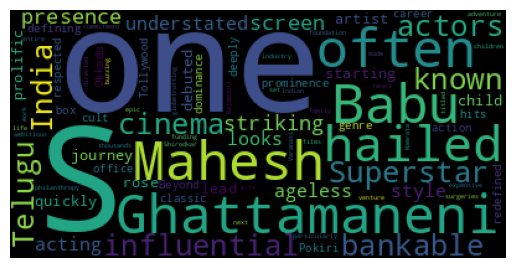

In [89]:
plt.imshow(wc)
plt.axis('off')
plt.show()#the most important one will be displayed,automatically removes lot of stopwords

In [90]:
txt = '''Ghattamaneni Mahesh Babu, often hailed as the "Superstar" of Telugu cinema, is one of the most influential and bankable actors in India, known for his
striking screen presence, understated acting style, and "ageless" looks.'''

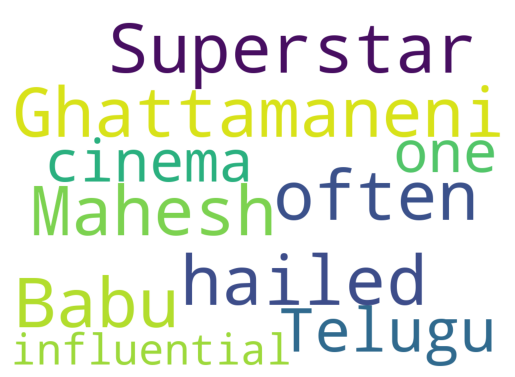

In [95]:
#initializing the wordcloud has it is having so many parameters
wcloud = WordCloud(width = 1000, height = 720, margin = 2, max_words = 10, background_color = 'white')
plt.imshow(wcloud.generate(txt))
plt.axis('off')
plt.show()

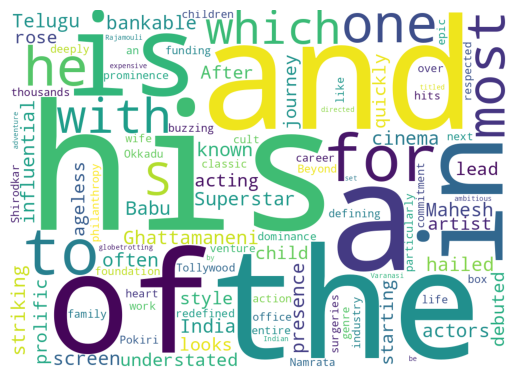

In [99]:
#now we will take above corpus
wc = WordCloud(width = 1000, height = 720, margin = 2, max_words = 100, background_color = 'white')
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


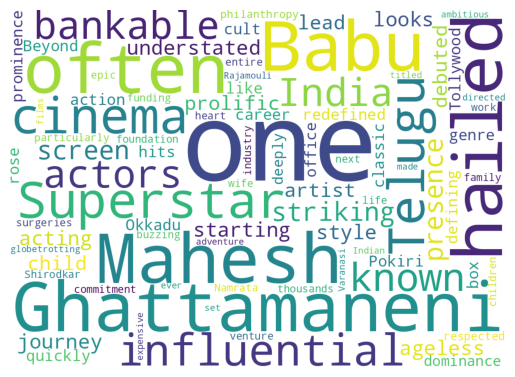

In [101]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
wc = WordCloud(width = 1000, height = 720, margin = 2, max_words = 100, background_color = 'white', stopwords= stopwords.words('english'))
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()  #stopwords are removed compare with above and check

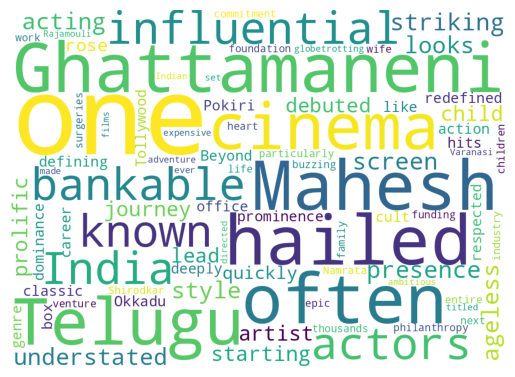

In [105]:
#we will add one stopword and we will check ---> we will add superstar as stop over and we will check whether we will have in image or not
stopword = stopwords.words('english')

stopword.append('Superstar')
stopword.append('Babu')

wc = WordCloud(width = 1000, height = 720, margin = 2, max_words = 100, background_color = 'white', stopwords= stopword)
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()# superstar and babu are removed